# Multi-Model Data Fusion Including Image Data

### Overview
Multi-model data fusion involves combining data from different sources to create a comprehensive dataset that offers a richer and more complete view of the information. In this example, we aim to fuse customer data, purchase history, website activity, and image data from the MNIST dataset.

### Data Sources
1. **Customer Data**: This dataset includes basic information about customers, such as customer ID, name, age, and email.
2. **Purchase Data**: This dataset records customers' purchase history, including purchase ID, customer ID, product purchased, and the amount spent.
3. **Website Activity Data**: This dataset logs customers' activities on a website, including activity ID, customer ID, pages visited, and duration spent on each page.
4. **MNIST Image Data**: The MNIST dataset consists of handwritten digit images. For this example, we will use a small subset of these images.

### Steps Involved
1. **Data Collection**:
   - Generate synthetic data for customer information, purchase history, and website activity.
   - Download a small subset of the MNIST dataset to reduce time and memory usage.

2. **Data Preparation**:
   - Ensure each dataset contains a common identifier (customer ID) to enable merging.
   - Preprocess the image data to associate it with the corresponding customer IDs.

3. **Data Fusion**:
   - Merge the customer data with the purchase data using the customer ID.
   - Merge the resulting dataset with the website activity data.
   - Finally, merge the combined dataset with the MNIST image data.

4. **Output**:
   - Display and save the fused dataset, which now contains a comprehensive view of each customer, including their basic information, purchase history, website activity, and associated image data.

### Benefits
- **Comprehensive View**: Combining multiple data sources provides a holistic view of customer behavior and preferences.
- **Enhanced Insights**: The fused dataset allows for better analysis and insights, supporting improved decision-making.
- **Resource Efficiency**: Using a smaller subset of the MNIST dataset ensures the process is efficient in terms of time and memory usage.


Download complete. Processing data...
Customer Data:


,customer_id,name,age,email
0,1,Alice,25,alice@example.com
1,2,Bob,32,bob@example.com
2,3,Charlie,37,charlie@example.com
3,4,David,45,david@example.com
4,5,Eva,29,eva@example.com


Purchase Data:


,purchase_id,customer_id,product,amount
0,101,1,Laptop,1000
1,102,1,Mouse,50
2,103,2,Keyboard,75
3,104,4,Monitor,150
4,105,5,Chair,120


Website Activity Data:


,activity_id,customer_id,page_visited,duration
0,201,1,Home,5
1,202,2,Products,10
2,203,2,Cart,3
3,204,3,Checkout,7
4,205,5,Home,6


Sample Images:


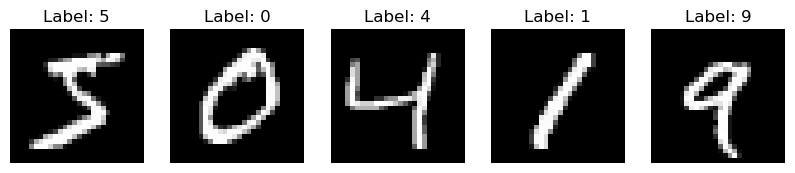

Fused Data:


,customer_id,name,age,email,purchase_id,product,amount,activity_id,page_visited,duration,...,774,775,776,777,778,779,780,781,782,783
0,1,Alice,25,alice@example.com,101.0,Laptop,1000.0,201.0,Home,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Alice,25,alice@example.com,102.0,Mouse,50.0,201.0,Home,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Bob,32,bob@example.com,103.0,Keyboard,75.0,202.0,Products,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,Bob,32,bob@example.com,103.0,Keyboard,75.0,203.0,Cart,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,Charlie,37,charlie@example.com,NaN,NaN,NaN,204.0,Checkout,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fused data (excluding images) saved to multi_model_fused_data.csv


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Function to create customer data
def create_customer_data():
    '''
    Create synthetic customer data

    Returns:
        DataFrame: Customer data with columns: customer_id, name, age, email
    '''
    customer_data = {
        'customer_id': [1, 2, 3, 4, 5],
        'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'age': [25, 32, 37, 45, 29],
        'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 'eva@example.com']
    }
    return pd.DataFrame(customer_data)

# Function to create purchase data
def create_purchase_data():
    '''
    Create synthetic purchase data

    Returns:
        DataFrame: Purchase data with columns: purchase_id, customer_id, product, amount
    '''
    purchase_data = {
        'purchase_id': [101, 102, 103, 104, 105],
        'customer_id': [1, 1, 2, 4, 5],
        'product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Chair'],
        'amount': [1000, 50, 75, 150, 120]
    }
    return pd.DataFrame(purchase_data)

# Function to create website activity data
def create_website_activity_data():
    '''
    Create synthetic website activity data

    Returns:
        DataFrame: Website activity data with columns: activity_id, customer_id, page_visited, duration
    '''
    website_activity_data = {
        'activity_id': [201, 202, 203, 204, 205],
        'customer_id': [1, 2, 2, 3, 5],
        'page_visited': ['Home', 'Products', 'Cart', 'Checkout', 'Home'],
        'duration': [5, 10, 3, 7, 6]  # duration in minutes
    }
    return pd.DataFrame(website_activity_data)

# Function to fetch a small subset of MNIST image data
def fetch_small_mnist_data(num_images=5):
    '''
    Fetch a small subset of MNIST image data

    Args:
        num_images (int): Number of images to fetch

    Returns:
        DataFrame: MNIST data with columns: customer_id, image
    '''
    print("Downloading subset of MNIST data... (takes about 1 min)")
    mnist = fetch_openml('mnist_784', version=1, data_home='./mnist_data', cache=True, as_frame=False)
    images = mnist.data[:num_images]
    labels = mnist.target[:num_images]
    
    print("Download complete. Processing data...")
    image_data = pd.DataFrame(images)
    image_data['customer_id'] = list(range(1, num_images + 1))
    return image_data, labels

# Function to display a small sample of images
def display_sample_images(images, labels, num_images=5):
    '''
    Display a small sample of images

    Args:
        images (DataFrame): DataFrame containing image data
        labels (Series): Series containing image labels
        num_images (int): Number of images to display
    '''
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images.iloc[i, :-1].values.reshape(28, 28), cmap='gray')  # Exclude the customer_id column
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

# Function to fuse multiple data sources
def multi_model_data_fusion(customer_df, purchase_df, activity_df, image_df):
    '''
    Fuse customer, purchase, website activity, and image data based on customer_id

    Args:
        customer_df (DataFrame): DataFrame containing customer data
        purchase_df (DataFrame): DataFrame containing purchase data
        activity_df (DataFrame): DataFrame containing website activity data
        image_df (DataFrame): DataFrame containing image data

    Returns:
        DataFrame: Fused DataFrame combining all sources of data
    '''
    # Merge customer and purchase data
    customer_purchase_df = pd.merge(customer_df, purchase_df, on='customer_id', how='left')
    
    # Merge the result with website activity data
    customer_purchase_activity_df = pd.merge(customer_purchase_df, activity_df, on='customer_id', how='left')
    
    # Merge the result with image data
    fused_df = pd.merge(customer_purchase_activity_df, image_df, on='customer_id', how='left')
    
    return fused_df

# Create synthetic data
customer_df = create_customer_data()
purchase_df = create_purchase_data()
activity_df = create_website_activity_data()
image_df, labels = fetch_small_mnist_data()

# Display customer data
print("Customer Data:")
display(customer_df)

# Display purchase data
print("Purchase Data:")
display(purchase_df)

# Display website activity data
print("Website Activity Data:")
display(activity_df)

# Display sample images
print("Sample Images:")
display_sample_images(image_df, labels)

# Fuse data
fused_df = multi_model_data_fusion(customer_df, purchase_df, activity_df, image_df)

# Display fused data
print("Fused Data:")
display(fused_df.head())

# Save fused data to a CSV file (excluding image data for simplicity)
fused_df_excl_images = fused_df.drop(columns=fused_df.columns[-784:])  # dropping image data columns
fused_df_excl_images.to_csv('multi_model_fused_data.csv', index=False)
print("Fused data (excluding images) saved to multi_model_fused_data.csv")
